In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import re
from collections import Counter

# Load the Adidas job descriptions CSV (replace with the actual file paths)
adidas_complete_job_desc_file = 'adidas_jobs_complete.csv'

# Read the file
adidas_complete_df = pd.read_csv(adidas_complete_job_desc_file)

# Clean the "Job Description" column and prepare it for frequency analysis
adidas_complete_df['Job Description'] = adidas_complete_df['Job Description'].str.replace('\r\n', ' ').str.strip()

# Split the job descriptions into sentences/paragraphs and count the frequency
all_adidas_complete_paragraphs = []
for details in adidas_complete_df['Job Description']:
    paragraphs = re.split(r'[.!\n]', details)
    paragraphs = [para.strip() for para in paragraphs if para.strip()]  # Remove empty and whitespace-only strings
    all_adidas_complete_paragraphs.extend(paragraphs)

# Count the frequency of each unique paragraph
adidas_complete_paragraph_freq = Counter(all_adidas_complete_paragraphs)
adidas_complete_paragraph_freq_df = pd.DataFrame(adidas_complete_paragraph_freq.items(), columns=['Paragraph', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Filter paragraphs that appear more than 20 times
frequent_paragraphs_df = adidas_complete_paragraph_freq_df[adidas_complete_paragraph_freq_df['Frequency'] > 20]

# Define categories from the image
adidas_complete_categories = [
    'Diversity Equity and Inclusion', 'Attracting the right talent', 
    'Employee Listening', 'Building role-model leadership', 
    'Health Management', 'Work-life integration', 
    'Mindset of continuous learning', 
    'Recognizing both individual and team performance'
]

# Define a function to classify paragraphs based on analysis
def classify_paragraph(paragraph):
    """Classify the paragraph into one of the eight categories based on content analysis."""
    paragraph = paragraph.lower()
    if 'diversity' in paragraph or 'equity' in paragraph or 'inclusion' in paragraph:
        return 'Diversity, Equity and Inclusion'
    elif 'talent' in paragraph or 'recruitment' in paragraph:
        return 'Attracting the right talent'
    elif 'employee' in paragraph and 'feedback' in paragraph:
        return 'Employee Listening'
    elif 'leadership' in paragraph or 'role-model' in paragraph:
        return 'Building role-model leadership'
    elif 'health' in paragraph or 'well-being' in paragraph:
        return 'Health Management'
    elif 'work-life' in paragraph or 'balance' in paragraph or 'integration' in paragraph:
        return 'Work-life integration'
    elif 'learning' in paragraph or 'development' in paragraph or 'continuous' in paragraph:
        return 'Mindset of continuous learning'
    elif 'performance' in paragraph or 'recognition' in paragraph or 'team' in paragraph:
        return 'Recognizing both individual and team performance'
    else:
        return 'Uncategorized'

# Apply the classification to paragraphs that appear more than 20 times
frequent_paragraphs_df['Classification'] = frequent_paragraphs_df['Paragraph'].apply(classify_paragraph)

# Initialize the classification columns with False values
for category in adidas_complete_categories:
    frequent_paragraphs_df[category] = False

# Set the appropriate category to True based on the classified result
for index, row in frequent_paragraphs_df.iterrows():
    classification = row['Classification']
    if classification in adidas_complete_categories:
        frequent_paragraphs_df.at[index, classification] = True

# Remove the temporary classification column
frequent_paragraphs_df = frequent_paragraphs_df.drop(columns=['Classification'])

C:\Users\WANG-\AppData\Local\Temp\ipykernel_38744\4081978764.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_paragraphs_df['Classification'] = frequent_paragraphs_df['Paragraph'].apply(classify_paragraph)
C:\Users\WANG-\AppData\Local\Temp\ipykernel_38744\4081978764.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_paragraphs_df[category] = False
C:\Users\WANG-\AppData\Local\Temp\ipykernel_38744\4081978764.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [23]:
frequent_paragraphs_df.to_csv('adidas_classified.csv')
frequent_paragraphs_df=pd.read_csv('adidas_classified_byhand.csv')

frequent_paragraphs_df.head(10)

,Unnamed: 0,Paragraph,Frequency,Diversity Equity and Inclusion,Attracting the right talent,Employee Listening,Building role-model leadership,Health Management,Work-life integration,Mindset of continuous learning,Recognizing both individual and team performance
0,115,Zweck & Gesamtrelevanz für die Organisation:,62,False,False,False,False,False,False,False,False
1,148,Benötigte Ausbildung und Erfahrung / Mindestan...,61,False,False,False,False,False,False,False,False
2,119,Verantwortlichkeiten:,60,False,False,False,False,False,False,False,False
3,142,Vorwiegende Kontakte:,54,False,False,False,False,False,False,False,False
4,152,Grundlegende Rechtschreib- und Rechenkenntniss...,51,False,False,False,False,False,False,False,False
5,143,Kunden,48,False,False,False,False,False,False,False,False
6,140,Befugnisse:,47,False,False,False,False,False,False,False,False
7,990,Kollegen und Vorgesetzte,41,False,False,False,False,False,False,False,False
8,1665,"Belastbarkeit, Flexibilität, Teamfähigkeit",41,False,False,False,False,False,False,False,True
9,1653,Unterstützt in der Durchführung unserer Store ...,41,False,False,False,False,False,False,False,False


c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WANG-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

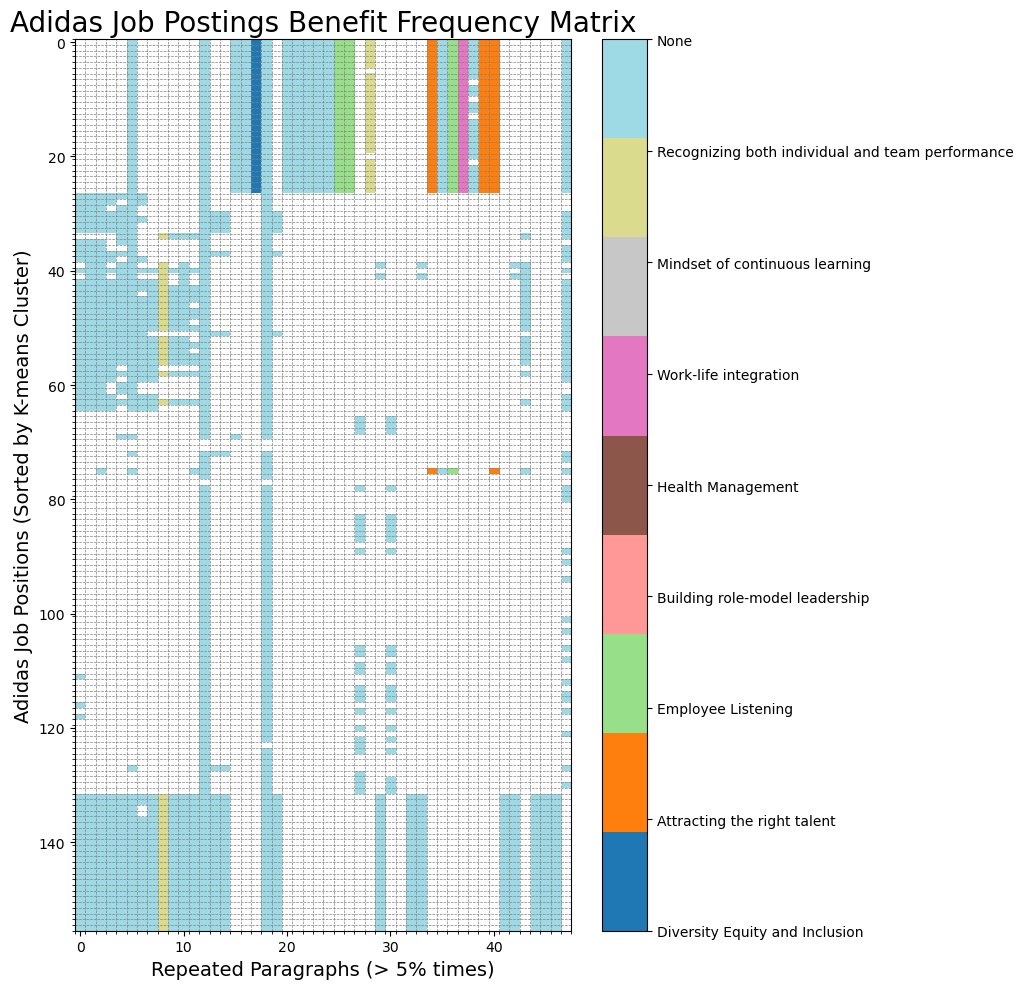

In [26]:
# Convert classified paragraphs into a matrix for the heatmap
adidas_job_paragraphs_matrix = np.full((len(adidas_complete_df), len(frequent_paragraphs_df)), np.nan)

for i, details in enumerate(adidas_complete_df['Job Description']):
    if isinstance(details, float) and np.isnan(details):  # Skip if details is NaN
        continue
    for j, paragraph in enumerate(frequent_paragraphs_df['Paragraph']):
        if isinstance(paragraph, float) and np.isnan(paragraph):  # Skip if paragraph is NaN
            continue
        if paragraph in str(details):
            row = frequent_paragraphs_df.iloc[j]
            class_color = 'None'  # Default to none/gray
            for category in adidas_complete_categories:
                if row[category]:  # Check for True values in classification columns
                    class_color = category
                    break
            adidas_job_paragraphs_matrix[i, j] = adidas_complete_categories.index(class_color) if class_color in adidas_complete_categories else len(adidas_complete_categories)
# Apply KMeans clustering to the Adidas job descriptions based on the paragraph occurrences
kmeans = KMeans(n_clusters=4, random_state=42)
adidas_job_clusters = kmeans.fit_predict(np.nan_to_num(adidas_job_paragraphs_matrix))  # Convert NaN to 0 for clustering

# Add the cluster labels to the dataframe for sorting
adidas_complete_df['Cluster'] = adidas_job_clusters


# Sort the job descriptions based on their assigned cluster
sorted_adidas_df = adidas_complete_df.sort_values(by='Cluster').reset_index(drop=True)


# Recreate the matrix for the heatmap, sorted by clusters
sorted_adidas_job_paragraphs_matrix = np.full((len(sorted_adidas_df), len(frequent_paragraphs_df)), np.nan)

for i, details in enumerate(adidas_complete_df['Job Description']):
    if isinstance(details, float) and np.isnan(details):  # Skip if details is NaN
        continue
    for j, paragraph in enumerate(frequent_paragraphs_df['Paragraph']):
        if isinstance(paragraph, float) and np.isnan(paragraph):  # Skip if paragraph is NaN
            continue
        if paragraph in str(details):
            row = frequent_paragraphs_df.iloc[j]
            class_color = 'None'  # Default to none/gray
            for category in adidas_complete_categories:
                if row[category]:  # Check for True values in classification columns
                    class_color = category
                    break
            adidas_job_paragraphs_matrix[i, j] = adidas_complete_categories.index(class_color) if class_color in adidas_complete_categories else len(adidas_complete_categories)

# Apply KMeans clustering to the Adidas job descriptions based on the paragraph occurrences
kmeans = KMeans(n_clusters=4, random_state=42)
adidas_job_clusters = kmeans.fit_predict(np.nan_to_num(adidas_job_paragraphs_matrix))  # Convert NaN to 0 for clustering

# Add the cluster labels to the dataframe for sorting
adidas_complete_df['Cluster'] = adidas_job_clusters

# Recreate the matrix for the heatmap, sorted by clusters
sorted_adidas_job_paragraphs_matrix = np.full((len(sorted_adidas_df), len(frequent_paragraphs_df)), np.nan)

for i, details in enumerate(sorted_adidas_df['Job Description']):
    details = str(details)  # Convert details to string to avoid TypeError
    for j, paragraph in enumerate(frequent_paragraphs_df['Paragraph']):
        paragraph = str(paragraph)  # Convert paragraph to string to avoid TypeError
        if paragraph in details:
            row = frequent_paragraphs_df.iloc[j]
            class_color = 'None'  # Default to none/gray
            for category in adidas_complete_categories:
                if row[category]:  # Check for True values in classification columns
                    class_color = category
                    break
            sorted_adidas_job_paragraphs_matrix[i, j] = (
                adidas_complete_categories.index(class_color)
                if class_color in adidas_complete_categories
                else len(adidas_complete_categories)
            )

# Plot the heatmap with jobs sorted by cluster
plt.figure(figsize=(10, 10))
cmap = plt.cm.get_cmap('tab20', len(adidas_complete_categories) + 1)  # Include an additional color for 'None'
cmap.set_bad(color='white')  # Set white for missing values (NaN)

plt.imshow(sorted_adidas_job_paragraphs_matrix, cmap=cmap, aspect='auto', vmin=0, vmax=len(adidas_complete_categories))  # Ensure the value range matches the color range

# Create a colorbar with class labels
class_labels_for_colorbar = adidas_complete_categories + ['None']
cbar = plt.colorbar(ticks=np.arange(len(class_labels_for_colorbar)))  # Use np.arange to match the number of labels
cbar.ax.set_yticklabels(class_labels_for_colorbar, fontsize=10)

# Set ticks in the middle of the grid squares
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, len(frequent_paragraphs_df), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(sorted_adidas_df), 1), minor=True)

# Add grid to the heatmap, aligning with minor ticks to create boundaries around each data point
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, which='minor')

# Label the axes
plt.xlabel('Repeated Paragraphs (> 5% times)', fontsize=14)
plt.ylabel('Adidas Job Positions (Sorted by K-means Cluster)', fontsize=14)
plt.title('Adidas Job Postings Benefit Frequency Matrix', fontsize=20)

plt.tight_layout()
plt.show()